#  20 Nov 23 - Notes: Random Processes

Until now, all of our work has been with [deterministic systems](https://en.wikipedia.org/wiki/Deterministic_system). That is, we have a set of equations that allow us to describe the future of the system in space and time with certainty. Some differential equations are deterministic and all the ones that we have worked on so far are. Our analysis of ordinary differential equations, partial differential equations, and the wave equation have all been drawn from deterministic systems. We obtain equations or results that we can predict with (up to numerical) certainty. 

However, many processes in nature are not deterministic. These processes are stochastic, probabilistic, or [random](https://en.wikipedia.org/wiki/Randomness). We use these terms interchangeable, but ultimately the all describe a system with probabilistic states. These can be things like [the ideal gas in statistical mechanics](https://en.wikipedia.org/wiki/Ideal_gas) or [the hydrogen atom in quantum mechanics](https://en.wikipedia.org/wiki/Hydrogen_atom). But this work applies in contexts like the [stock market](https://bsj.berkeley.edu/how-scientists-are-using-statistical-physics-to-predict-the-stock-market/), [weather](https://en.wikipedia.org/wiki/Numerical_weather_prediction), [the spread of disease](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.104.014132), and even [information theory](https://en.wikipedia.org/wiki/Information_theory).

## Entropy

We will start with the concept of [Entropy](https://en.wikipedia.org/wiki/Entropy), which serves as a major organizing idea for many statistical physics models and results. For example, conservation of energy tells us that the same amount of energy is needed for a ball to change its height (moving up or down), but the concept of increased entropy indicates the ball won't spontaeously jump off the table. 

### Video

We will eventually develop a mathematical definition of entropy, quoted below:

$$S = k \ln(\Omega)$$

where $k$ is the [Boltzmann constant](https://en.wikipedia.org/wiki/Boltzmann_constant) and $\Omega$ is the ["multiplicity"](https://en.wikipedia.org/wiki/Multiplicity_(statistical_mechanics)) of the system.

## Modeling Randomness


In [16]:

import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def flip_coin():
    """Simulate a single coin flip."""
    return 1 if random.random() < 0.5 else 0

def simulate_flips(trials, flips):
    """Simulate multiple trials of coin flips."""
    heads = np.zeros(trials)
    for i in range(trials):
        for j in range(flips):
            heads[i] += flip_coin()
    return heads

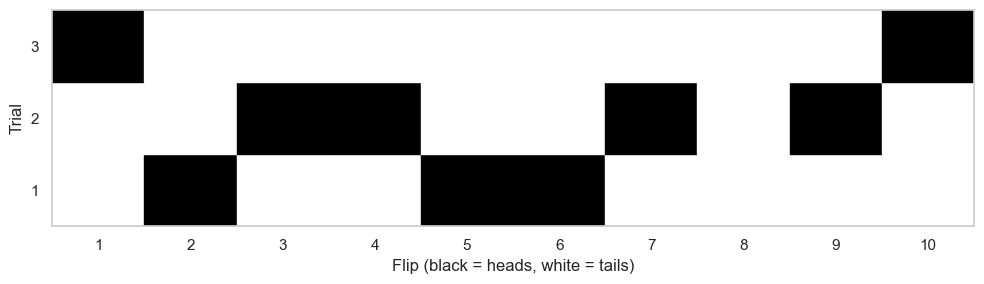

In [37]:
## Just code for a diagram; not needed in detail
num_rows = 3
coin_flips_per_row = 10

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, num_rows))

# Simulate coin flips and create multiple rows
for row in range(num_rows):
    coin_flips = np.random.randint(0, 2, size=coin_flips_per_row)
    
    # Plot each row of coin flips
    for i, flip in enumerate(coin_flips):
        color = 'black' if flip == 0 else 'white'
        ax.add_patch(plt.Rectangle((i, row), 1, 1, color=color))

# Set axis limits and labels
ax.set_xlim(0, coin_flips_per_row)
ax.set_ylim(0, num_rows)
ax.set_yticks(np.arange(num_rows) + 0.5, np.arange(num_rows) + 1)
ax.set_xticks(np.arange(coin_flips_per_row) + 0.5, np.arange(coin_flips_per_row) + 1)

plt.ylabel('Trial')
plt.xlabel('Flip (black = heads, white = tails)')

# Show the plot
plt.tight_layout()


## Microstates and Macrostates

Here's an example with 3 coins, which we can model numerically:

[![Microstates and Macrostates](https://markdown-videos-api.jorgenkh.no/youtube/9rYvq6kbUUA?width=720&height=405)](https://inv.tux.pizza/watch?v=9rYvq6kbUUA)

- Non-Commercial Link: [https://inv.tux.pizza/watch?v=9rYvq6kbUUA](https://inv.tux.pizza/watch?v=9rYvq6kbUUA)
- Commercial Link: [https://youtube.com/watch?v=9rYvq6kbUUA](https://youtube.com/watch?v=9rYvq6kbUUA)

In [10]:
# Set the number of trials and flips
trial_sets = [10, 50, 100, 500, 1000, 10000]
flips = 4

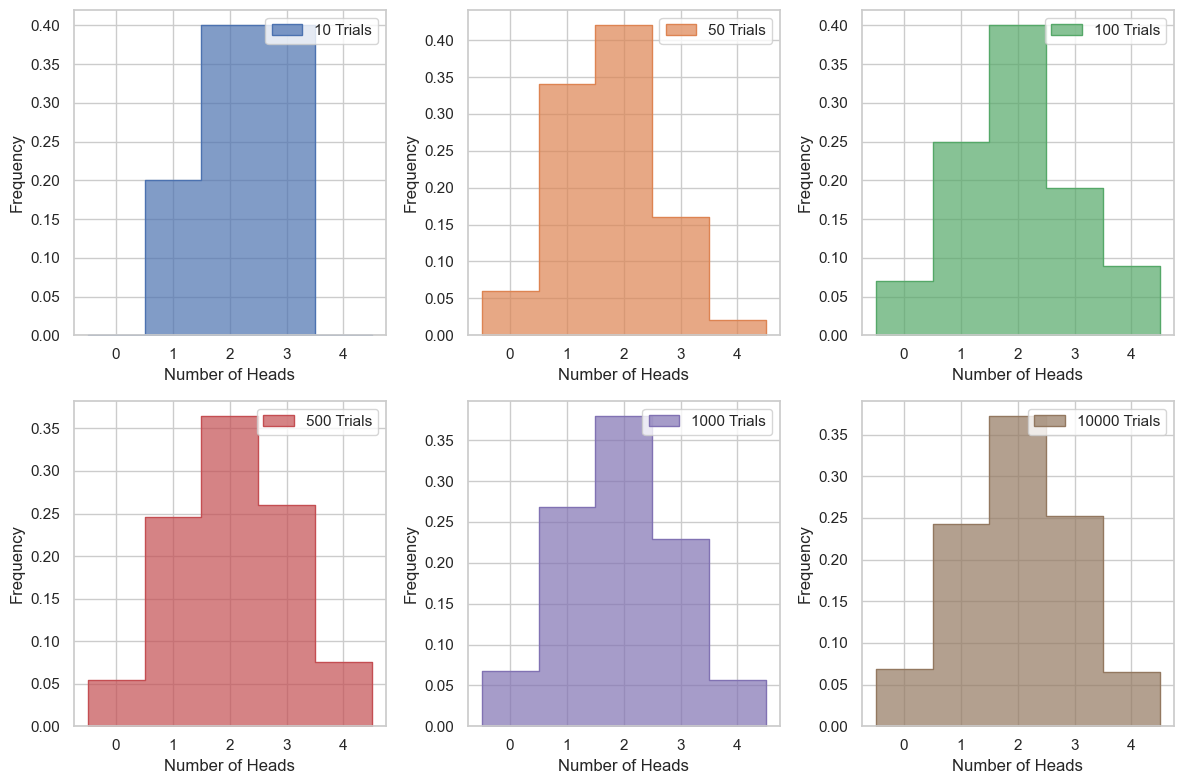

In [15]:
plt.figure(figsize=(12, 8))

# Set the seaborn style
sns.set(style="whitegrid")

for trials in trial_sets:
    
    index = trial_sets.index(trials)+1 # Set the subplot index
    n = len(trial_sets) # Set the number of subplots
    rows = int(np.ceil(n/2)) # Set the number of rows
    
    plt.subplot(2, rows, index)
    heads = simulate_flips(trials, flips)
    
    sns.histplot(heads, 
                 bins=np.arange(flips+2)-0.5, 
                 kde=False, stat="density", 
                 label=f'{trials} Trials', 
                 element="step", 
                 color=sns.color_palette()[index - 1],
                 alpha=0.7)
    plt.xlabel('Number of Heads')
    plt.ylabel('Frequency')
    plt.legend()
plt.tight_layout()

## Additional Resources

### Handwritten Notes

### Videos

Here's an interesting application of the models of Poisson process and Queueing

[![Queuing theory and Poisson process](https://markdown-videos-api.jorgenkh.no/youtube/rBIQmwaoZfs?width=720&height=405)](https://inv.tux.pizza/watch?v=rBIQmwaoZfs)

- Non-Commercial Link: [https://inv.tux.pizza/watch?v=rBIQmwaoZfs](https://inv.tux.pizza/watch?v=rBIQmwaoZfs)
- Commercial Link: [https://youtube.com/watch?v=rBIQmwaoZfs](https://youtube.com/watch?v=rBIQmwaoZfs)

